Для выполнения задания потребуется самому сгенерировать данные с помощью модуля random (все пункты выполняются с помощью нее).

Что необходимо, для создания будущей таблицы:

0) Для генерации данных в random необходимо установить seed = "АДВИ_2023", длина каждого списка N = 1000;

1) index колонка: создать список из N последовательных целых элементов от 1 до 1000 включительно, далее, с помощью специальной функции random перемешать его;

2) groups колонка: создать список из N элементов, состоящий из значений из списка ["группа_1", "группа_2", "группа_3", "группа_4", "группа_5"], необходимо использовать функцию из random которая возвращает список элементов длины k, выбранных из последовательности population с перестановкой элементов;

3) uniform колонка: создать список из N элементов, состоящий из целых значение из равномерного распределения [50, 100] ;

4) gauss_1, gauss_2, gauss_3 колонки: Создать 3 списка из N элементов каждый, заполненные значениями из нормальных распределений с параметрами:

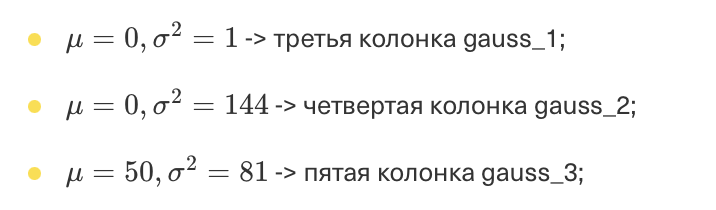

5) Создать pandas DataFrame, где (1) будет индексом, (2)-(4) колонки, названия колонок ["groups", "uniform", "gauss_1", "gauss_2", "gauss_3"] соответственно, не забывая проверить, что типы колонок должны соответствовать заявленным типам данных;

6) Для колонок gauss_1 и gauss_2 заменить значения на None:

Для gauss_1, если индекс у значение делится на 121 без остатка;
Для gauss_2, если дробная часть больше 0.95;

7) Теперь, для пропущенных значений gauss_1 и gauss_2:

Для gauss_2 None заменить на среднее по колонке;
Удалить строчки из таблицы, где gauss_1 == None.


In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
seed = "АДВИ_2023"
random.seed(a=seed)

In [3]:
N = 1000

In [4]:
index = list(range(1, N + 1))
random.shuffle(index)

In [5]:
groups = random.choices(["группа_1", "группа_2", "группа_3", "группа_4", "группа_5"], k = N)

In [6]:
uniform = [random.randint(50, 100) for _ in range(N)]

In [7]:
gauss_1 = [random.gauss(0, 1) for _ in range(N)]
gauss_2 = [random.gauss(0, 12) for _ in range(N)]
gauss_3 = [random.gauss(50, 9) for _ in range(N)]

In [17]:
data = pd.DataFrame()

In [18]:
data.index = index
data['groups'] = groups
data['uniform'] = uniform
data['gauss_1']  = gauss_1
data['gauss_2']  = gauss_2
data['gauss_3']  = gauss_3

In [19]:
data.loc[data.index % 121 == 0, 'gauss_1'] = None
data.loc[(data['gauss_2'] % 1 > 0.95) & (data['gauss_2'] > 0), 'gauss_2'] = None

In [20]:
data.loc[data['gauss_2'].isnull(), 'gauss_2'] = data['gauss_2'].mean()
data = data.dropna()
data

,groups,uniform,gauss_1,gauss_2,gauss_3
476,группа_1,95,3.010291,2.156346,57.455851
315,группа_5,77,0.190277,-9.934550,62.694177
490,группа_4,96,-0.282161,9.211071,54.688895
748,группа_3,56,1.127080,-12.391793,30.192353
471,группа_5,52,-1.238270,10.938748,52.682052
...,...,...,...,...,...
260,группа_4,57,-1.484164,-5.911598,49.330196
146,группа_4,78,-0.379041,-3.132954,60.329900
972,группа_1,52,-0.857206,0.835715,51.926114
161,группа_1,62,-0.195475,3.496498,66.310250


In [21]:
data['gauss_2'].mean()

-0.47379908256312986

In [22]:
import math
math.sqrt(data['gauss_2'].var())

12.06996394390761

In [27]:
data['groups'].value_counts()

группа_4    222
группа_1    215
группа_2    194
группа_3    184
группа_5    177
Name: groups, dtype: int64

In [34]:
data[data['groups'] == 'группа_5'].index.min()

6

In [36]:
q = data['uniform'].quantile(0.9)
data[data['uniform'] >= q ].count()

groups     118
uniform    118
gauss_1    118
gauss_2    118
gauss_3    118
dtype: int64

In [50]:
data.groupby('groups')['gauss_1'].min()

groups
группа_1   -3.628448
группа_2   -2.692705
группа_3   -2.606773
группа_4   -3.933254
группа_5   -2.639733
Name: gauss_1, dtype: float64

In [53]:
data.groupby('groups')['gauss_2'].min()

groups
группа_1   -22.109394
группа_2   -38.365537
группа_3   -36.187520
группа_4   -29.901064
группа_5   -40.394911
Name: gauss_2, dtype: float64

In [54]:
data['new'] = (data['gauss_1'] + data['gauss_2']) / data['gauss_3']

In [55]:
data['new'].quantile(0.7)

0.10641825158661447